# Proyek Analisis Sentimen 
- **Nama:** Muhammad Aldy Naufal Fadhilah
- **Email:** aldy.naufal02@gmail.com
- **ID Dicoding:** aldy_naufal

## Import Library

In [1]:
%pip install -r requirements.txt

Selanjutnya masuk ke dalam tahap processing data, namun sebelum itu saya memerlukan instalasi semua dependensi atau pustaka yang dibutuhkan dalam proyek ini dengan menjalankan perintah `%pip install -r requirements.txt`. Perintah ini akan membaca file `requirements.txt`, yang berisi daftar pustaka Python beserta versinya, lalu menginstalnya secara otomatis ke dalam lingkungan kerja agar semua fungsi dan modul yang dibutuhkan saat pemrosesan data dapat dijalankan tanpa error.

In [27]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import pandas as pd

import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download resources needed for nltk (only run once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from spellchecker import SpellChecker
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


from sklearn.utils import resample

from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Masking
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\FX506\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\FX506\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FX506\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\FX506\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Setelah menginstal semua library tersebut, saya melakukan proses *data preprocessing* dan analisis sentimen dengan menggunakan berbagai alat dari pustaka NLP dan machine learning. Tahapan ini dimulai dari pembersihan data teks seperti menghapus karakter khusus, menghilangkan stopwords, melakukan tokenisasi, serta lemmatisasi agar teks menjadi lebih bersih dan siap dianalisis. Selain itu, saya juga menggunakan alat seperti *SpellChecker* untuk memperbaiki ejaan, *TfidfVectorizer* dan *Word2Vec* untuk mengubah teks menjadi representasi numerik, serta *SentimentIntensityAnalyzer* dari NLTK untuk melakukan analisis sentimen. Setelah data siap, saya melanjutkan ke tahap pelatihan model klasifikasi menggunakan algoritma seperti Random Forest, XGBoost, dan jaringan saraf (neural network) untuk mengklasifikasikan sentimen berdasarkan isi ulasan pengguna.

## Preprocessing Data

In [ ]:
data = pd.read_csv("data/netflix_reviews.csv")

Pertama-tama masuk ke dalam tahap pre-processing, saya mulai dengan membaca data ulasan yang telah disimpan sebelumnya menggunakan perintah `data = pd.read_csv("data/netflix_reviews.csv")`. Langkah ini bertujuan untuk memuat seluruh isi file CSV ke dalam bentuk DataFrame agar dapat diolah lebih lanjut. Setelah data berhasil dimuat, proses pre-processing akan dilakukan untuk membersihkan dan menyiapkan teks ulasan, seperti menghapus karakter yang tidak relevan, mengubah huruf menjadi lowercase, menghilangkan stopwords, serta melakukan tokenisasi dan lemmatisasi agar data siap digunakan dalam analisis dan pelatihan model.

In [4]:
slangwords_en = {
    "u": "you", "ur": "your", "r": "are", "b4": "before", "gr8": "great",
    "idk": "i don't know", "lol": "laugh out loud", "omg": "oh my god",
    "brb": "be right back", "btw": "by the way", "lmk": "let me know",
    "tbh": "to be honest", "smh": "shaking my head", "imo": "in my opinion",
    "imho": "in my humble opinion", "thx": "thanks", "ty": "thank you",
    "np": "no problem", "afaik": "as far as i know", "asap": "as soon as possible",
    "bff": "best friend forever", "dm": "direct message", "jk": "just kidding",
    "nvm": "never mind", "omw": "on my way", "rofl": "rolling on the floor laughing",
    "ttyl": "talk to you later", "ya": "yeah", "bc": "because", "cya": "see you",
    "tho": "though", "pls": "please", "plz": "please", "wanna": "want to",
    "gonna": "going to", "gotta": "got to", "lemme": "let me", "kinda": "kind of",
    "dunno": "do not know", "ya'll": "you all", "y'all": "you all", "wassup": "what is up"
}

Selanjutnya, saya menetapkan terlebih dahulu kamus slang `slangwords_en` yang berisi pasangan kata slang dan padanannya dalam bahasa formal. Kamus ini akan digunakan untuk mengganti kata-kata slang yang umum ditemukan dalam ulasan pengguna dengan bentuk kata yang lebih baku dan mudah dipahami. Proses ini bertujuan untuk meningkatkan kualitas teks dan memastikan analisis yang lebih akurat, khususnya dalam analisis sentimen dan pemodelan teks. Setelah kamus slang disiapkan, tahap selanjutnya adalah menerapkan pemetaan ini pada teks ulasan agar kata-kata slang dapat digantikan sesuai dengan definisinya.

In [5]:
spell = SpellChecker(language='en')
lemmatizer = WordNetLemmatizer()
stopword_set_en = set(stopwords.words('english'))

# Regex pattern to remove emojis
emoji_pattern = re.compile(
    "["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    u"\U00002700-\U000027BF"  # Dingbats
    u"\U000024C2-\U0001F251"  # Enclosed characters
    "]+", flags=re.UNICODE
)

def clean_text_en(text):
    text = re.sub(r"http\S+|@\S+|#\S+|RT[\s]+", "", text)  # remove URLs, mentions, hashtags, RT
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = emoji_pattern.sub(r'', text)  # remove emojis
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    return text.lower().strip()

def replace_slang(text, slang_dict):
    return ' '.join([slang_dict.get(word, word) for word in text.split()])

def correct_spelling(text):
    words = text.split()
    corrected = []
    for word in words:
        if word in spell:
            corrected.append(word)
        else:
            correction = spell.correction(word)
            corrected.append(correction if correction else word)
    return ' '.join(corrected)

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

def preprocess_english(text):
    text = clean_text_en(text)
    text = replace_slang(text, slangwords_en)
    text = correct_spelling(text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopword_set_en]
    lemmatized = lemmatize_tokens(tokens)
    return ' '.join(lemmatized)


Proses preprocessing dimulai dengan membersihkan teks menggunakan fungsi `clean_text_en`, yang menghapus elemen-elemen tidak relevan seperti URL, mention, hashtag, angka, emoji, dan tanda baca, serta mengubah teks menjadi huruf kecil. Selanjutnya, fungsi `replace_slang` menggantikan kata-kata slang yang ditemukan dalam teks dengan padanan kata baku yang sudah didefinisikan dalam kamus `slangwords_en`. Setelah itu, fungsi `correct_spelling` digunakan untuk memperbaiki ejaan kata-kata yang salah ketik dengan menggunakan pustaka `SpellChecker`. Teks kemudian di-tokenisasi dengan `word_tokenize` dan stopwords dihapus, yaitu kata-kata yang tidak memberikan kontribusi penting dalam analisis. Terakhir, fungsi `lemmatize_tokens` melakukan lemmatization untuk mengubah kata-kata ke bentuk dasarnya. Semua langkah ini digabungkan dalam fungsi utama `preprocess_english`, yang menghasilkan teks yang lebih bersih, relevan, dan siap digunakan untuk analisis lanjutan seperti analisis sentimen atau pemodelan teks.

In [6]:
data['Cleaned Review'] = data['Review Text'].apply(preprocess_english)

Kemudian saya mencoba menerapkan fungsi `preprocess_english` pada kolom `Review Text` di dalam DataFrame `data` dengan menggunakan metode `apply()`. Hasilnya disimpan dalam kolom baru bernama `Cleaned Review`, di mana setiap ulasan dalam kolom tersebut akan diproses sesuai dengan langkah-langkah pembersihan yang telah dijelaskan sebelumnya. Dengan cara ini, saya bisa memastikan bahwa setiap ulasan dalam dataset telah dibersihkan dan diproses dengan benar, sehingga siap untuk digunakan dalam analisis lebih lanjut, seperti analisis sentimen atau pelatihan model klasifikasi.

## Labeling Data

In [7]:
# Inisialisasi analyzer
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    compound_score = sentiment_score['compound']
    
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

Masuk ke tahap labelling, di sini saya melakukan analisis sentimen pada kolom `Cleaned Review` dengan menggunakan `SentimentIntensityAnalyzer` dari pustaka NLTK. Fungsi `get_sentiment` akan menghitung skor polaritas untuk setiap teks ulasan dan mengkategorikan hasilnya menjadi tiga label: 'Positive', 'Negative', atau 'Neutral'. Skor komposit (`compound_score`) yang dihasilkan oleh analyzer digunakan untuk menentukan label sentimen. Jika skor komposit lebih besar dari atau sama dengan 0.05, maka sentimen dianggap positif; jika skor komposit kurang dari atau sama dengan -0.05, maka sentimen dianggap negatif; dan jika berada di antara keduanya, sentimen dianggap netral. Hasil label sentimen ini kemudian dapat digunakan untuk analisis lebih lanjut atau untuk pelatihan model klasifikasi.

In [8]:
# Terapkan analisis sentimen setelah memastikan datanya aman
data['Sentiment'] = data['Cleaned Review'].apply(get_sentiment)

# Lihat hasil awal
data.head()

,Review Text,Score,Date,User,Cleaned Review,Sentiment
0,I have been denied all things even insulted an...,1,2025-04-15 13:04:42,A Google user,denied thing even insulted assaulted since mom...,Negative
1,not worth it i share my account with my sister...,1,2025-04-15 12:47:41,A Google user,worth share account sister pay half half cant ...,Positive
2,Mantaaaabs... ⭐⭐⭐⭐⭐,5,2025-04-15 12:02:27,A Google user,mantaaaabs,Neutral
3,blthe best aap in India,5,2025-04-15 11:32:45,A Google user,bathe best map india,Positive
4,The brightness controls are useless.,2,2025-04-15 11:24:44,A Google user,brightness control useless,Negative


Kemudian saya mencoba menerapkan analisis sentimen pada kolom `Cleaned Review` setelah memastikan bahwa data sudah aman dan bersih. Dengan menggunakan fungsi `get_sentiment`, saya menambahkan kolom baru bernama `Sentiment` pada DataFrame `data`, yang berisi label sentimen ('Positive', 'Negative', atau 'Neutral') untuk setiap ulasan. Setelah itu, saya melihat hasil awal dari proses ini dengan memanggil `data.head()`, yang menampilkan lima baris pertama dari DataFrame yang sudah berisi kolom `Sentiment` baru untuk memastikan bahwa proses labelling sentimen berjalan dengan baik dan sesuai harapan.

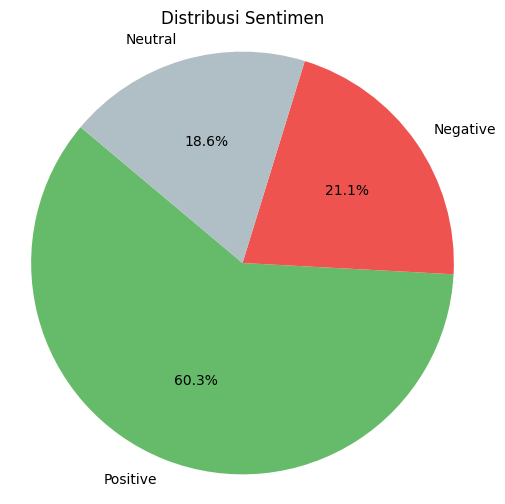

Sentiment
Positive    6026
Negative    2109
Neutral     1865
Name: count, dtype: int64


In [9]:
# Hitung jumlah label
sentiment_counts = data['Sentiment'].value_counts()

# Tentukan warna untuk tiap label
colors = {
    'Positive': '#66bb6a',  # hijau
    'Neutral': '#b0bec5',   # abu-abu
    'Negative': '#ef5350'   # merah
}

# Ambil warna sesuai urutan label pada indeks
label_order = sentiment_counts.index
color_list = [colors[label] for label in label_order]

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    sentiment_counts,
    labels=label_order,
    autopct='%1.1f%%',
    startangle=140,
    colors=color_list
)
plt.title('Distribusi Sentimen')
plt.axis('equal')
plt.show()

# Cek distribusi awal
sentiment_counts = data['Sentiment'].value_counts()
print(sentiment_counts)

Setelah proses pelabelan sentimen selesai, saya kemudian mencoba untuk melihat bagaimana distribusi label sentimen tersebar dalam dataset. Untuk itu, saya menghitung jumlah masing-masing label sentimen (‘Positive’, ‘Neutral’, dan ‘Negative’) dengan menggunakan fungsi `value_counts()` pada kolom `Sentiment`, dan menyimpannya dalam variabel `sentiment_counts`.

Selanjutnya, saya membuat visualisasi pie chart untuk menggambarkan distribusi sentimen tersebut. Saya menentukan warna khusus untuk masing-masing label sentimen agar visualisasi lebih informatif dan mudah dibedakan, yaitu warna hijau untuk *Positive*, abu-abu untuk *Neutral*, dan merah untuk *Negative*. Saya memastikan bahwa urutan warnanya sesuai dengan urutan label yang muncul dalam `sentiment_counts`.

Dengan menggunakan fungsi `plt.pie()`, saya membuat pie chart yang menunjukkan persentase masing-masing sentimen dalam dataset. Parameter `autopct='%1.1f%%'` digunakan untuk menampilkan persentase dalam format satu desimal pada setiap irisan pie chart. Saya juga mengatur judul pie chart menjadi **'Distribusi Sentimen'** dan mengatur tampilan grafik agar berbentuk lingkaran sempurna dengan `plt.axis('equal')`.

Hasil visualisasi yang dihasilkan menunjukkan bahwa mayoritas ulasan termasuk dalam kategori *Positive* sebesar **60.3%**, diikuti oleh *Negative* sebesar **21.1%**, dan sisanya *Neutral* sebesar **18.6%**. Hal ini menunjukkan bahwa secara umum, sentimen dalam ulasan cenderung positif. Visualisasi ini membantu memberikan gambaran umum yang cepat terhadap persebaran opini dalam data ulasan.

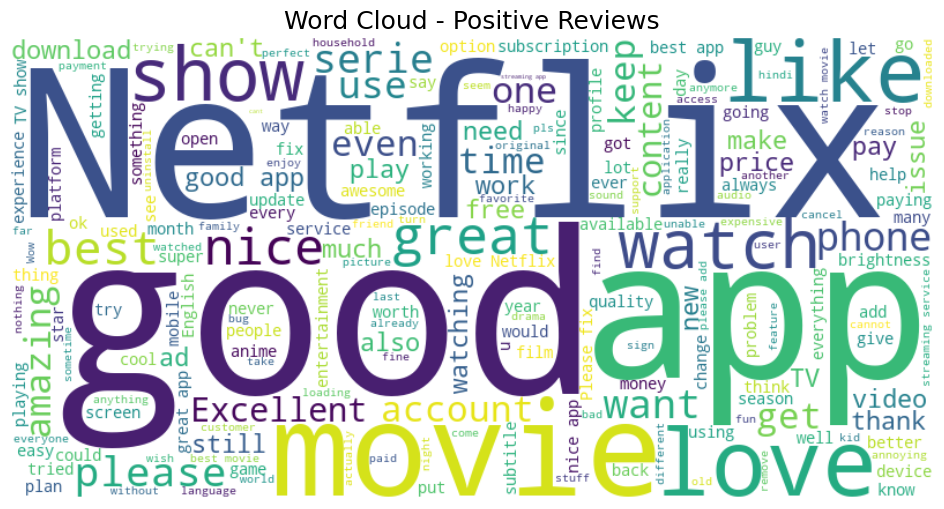

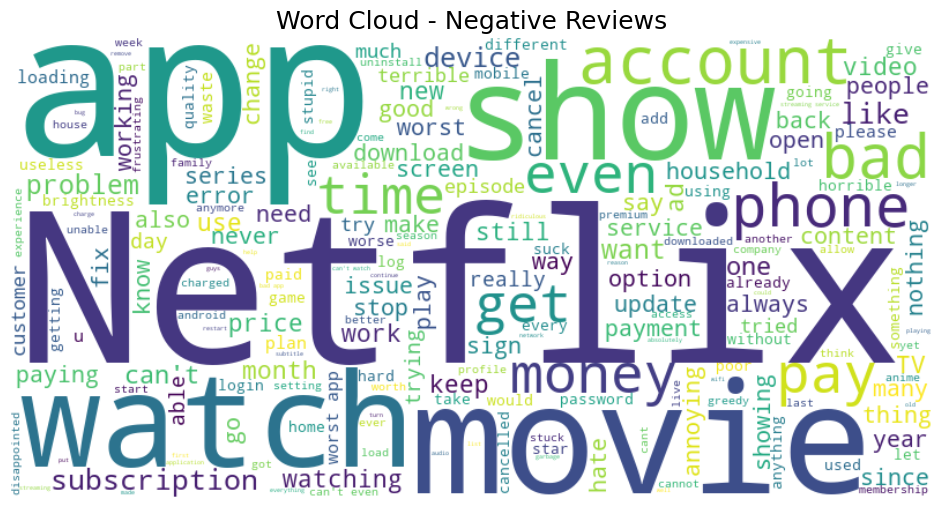

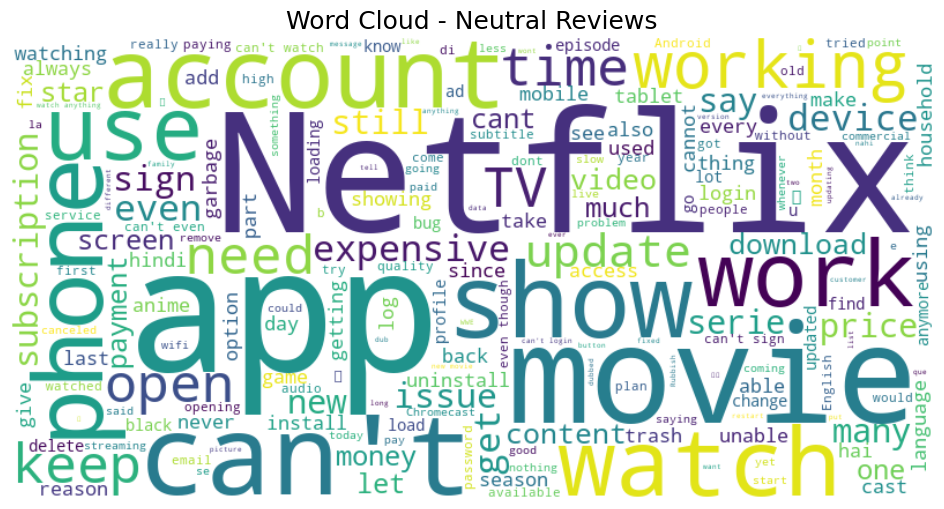

In [10]:
# Fungsi bantu untuk menampilkan word cloud berdasarkan kategori
def generate_sentiment_wordcloud(df, sentiment_label, title):
    text = ' '.join(df[df['Sentiment'] == sentiment_label]['Review Text'].dropna())
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=stopword_set_en  # bisa juga pakai set(stopwords.words('english'))
    ).generate(text)
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=18)
    plt.show()

# Generate WordCloud untuk tiap sentimen
generate_sentiment_wordcloud(data, 'Positive', 'Word Cloud - Positive Reviews')
generate_sentiment_wordcloud(data, 'Negative', 'Word Cloud - Negative Reviews')
generate_sentiment_wordcloud(data, 'Neutral', 'Word Cloud - Neutral Reviews')


Setelah mengetahui distribusi sentimen secara keseluruhan, saya kemudian melakukan eksplorasi lebih lanjut terhadap isi ulasan berdasarkan kategori sentimen menggunakan visualisasi **Word Cloud**. Tujuannya adalah untuk mengidentifikasi kata-kata yang paling sering muncul pada masing-masing jenis sentimen, yang dapat memberikan wawasan lebih mendalam mengenai isi dan fokus dari setiap kelompok sentimen.

Untuk itu, saya membuat sebuah **fungsi bantu bernama `generate_sentiment_wordcloud()`**. Fungsi ini menerima tiga parameter:  
- `df` (dataframe yang berisi ulasan dan label sentimen),  
- `sentiment_label` (kategori sentimen yang ingin divisualisasikan: `'Positive'`, `'Negative'`, atau `'Neutral'`), dan  
- `title` (judul untuk visualisasi Word Cloud).

Di dalam fungsi ini, saya menggabungkan seluruh teks ulasan (`Review Text`) yang sesuai dengan kategori sentimen yang diminta menggunakan `' '.join()`, dan menghapus nilai kosong dengan `dropna()` untuk menghindari error. Lalu, saya menggunakan library `WordCloud` untuk membangkitkan kumpulan kata yang paling sering muncul dalam ulasan tersebut, sambil menghapus kata-kata umum (stopwords) dengan bantuan `stopword_set_en`.

Kemudian, saya memvisualisasikan hasil Word Cloud tersebut menggunakan `matplotlib`. Ukuran gambar disesuaikan agar hasilnya lebih mudah dilihat dan dipahami.

Terakhir, saya memanggil fungsi ini tiga kali untuk masing-masing kategori sentimen:
- `generate_sentiment_wordcloud(data, 'Positive', 'Word Cloud - Positive Reviews')`
- `generate_sentiment_wordcloud(data, 'Negative', 'Word Cloud - Negative Reviews')`
- `generate_sentiment_wordcloud(data, 'Neutral', 'Word Cloud - Neutral Reviews')`

Visualisasi ini memungkinkan kita untuk dengan cepat mengidentifikasi topik, produk, atau kata kunci yang paling sering dikaitkan dengan ulasan positif, negatif, dan netral. Ini sangat berguna untuk memahami persepsi pengguna secara lebih kontekstual.

## Data Augmentation 

In [11]:
# Misal data kamu ada di variabel 'data' dan kolom labelnya 'Sentiment'
positive = data[data['Sentiment'] == 'Positive']
negative = data[data['Sentiment'] == 'Negative']
neutral = data[data['Sentiment'] == 'Neutral']

# Target jumlah sample yang ingin disamakan (jumlah Positive)
target_count = len(positive)

# Oversample Negative
negative_oversampled = resample(negative,
                                replace=True,
                                n_samples=target_count,
                                random_state=42)

# Oversample Neutral
neutral_oversampled = resample(neutral,
                               replace=True,
                               n_samples=target_count,
                               random_state=42)

# Gabungkan semua data
data_balanced = pd.concat([positive, negative_oversampled, neutral_oversampled])

# Acak ulang agar tidak urut berdasarkan label
data_balanced = data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Cek distribusi baru
print(data_balanced['Sentiment'].value_counts())

Sentiment
Neutral     6026
Positive    6026
Negative    6026
Name: count, dtype: int64


Karena terjadinya **imbalance data** pada distribusi label sentimen — di mana ulasan dengan label *Positive* jauh lebih banyak dibandingkan *Negative* dan *Neutral* — maka saya melakukan **oversampling** untuk menyeimbangkan jumlah data di setiap kelas.

Pertama, saya memisahkan data berdasarkan masing-masing label sentimen ke dalam tiga variabel:  
- `positive` untuk ulasan dengan label *Positive*,  
- `negative` untuk label *Negative*,  
- dan `neutral` untuk label *Neutral*.

Kemudian, saya menentukan jumlah target sample yang ingin disamakan, yaitu sebesar jumlah data pada kelas *Positive* (sebagai kelas mayoritas). Target ini disimpan dalam variabel `target_count`.

Untuk menyeimbangkan jumlah data, saya melakukan oversampling pada kelas *Negative* dan *Neutral* menggunakan fungsi `resample()` dari library `sklearn.utils`. Dengan parameter `replace=True`, saya mengizinkan pengambilan data dengan pengembalian, agar jumlah sampel dapat ditingkatkan hingga menyamai kelas mayoritas. Proses ini juga menggunakan `random_state=42` untuk memastikan hasil yang konsisten setiap kali dijalankan.

Setelah proses oversampling selesai, saya menggabungkan ketiga kelompok data tersebut (Positive, Negative Oversampled, dan Neutral Oversampled) menjadi satu dataset baru bernama `data_balanced`. Untuk memastikan bahwa data tidak berurutan berdasarkan label, saya mengacak ulang urutannya menggunakan `sample(frac=1)` dan mengatur ulang indeks dengan `reset_index(drop=True)`.

Terakhir, saya mencetak kembali distribusi label sentimen dalam dataset yang telah diseimbangkan menggunakan `value_counts()`. Hasilnya menunjukkan bahwa setiap kategori sentimen kini memiliki jumlah data yang sama, sehingga model klasifikasi yang akan dilatih nantinya tidak akan bias terhadap salah satu kelas akibat ketidakseimbangan data.

## Features Ekstraction 

In [12]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data_balanced['Cleaned Review'])

Setelah data berhasil diseimbangkan, saya melanjutkan proses dengan mengubah teks ulasan yang telah dibersihkan menjadi bentuk numerik menggunakan pendekatan TF-IDF (Term Frequency - Inverse Document Frequency). Teknik ini digunakan untuk merepresentasikan teks dalam bentuk vektor angka, yang mencerminkan seberapa penting suatu kata dalam sebuah ulasan dibandingkan dengan keseluruhan korpus. Karena terjadinya imbalance data sebelumnya, penting untuk memastikan bahwa representasi fitur dari teks ini mencakup kata-kata yang benar-benar relevan. Dengan membatasi jumlah fitur hanya pada kata-kata yang paling informatif, hasil transformasi ini kemudian siap digunakan sebagai input dalam tahap pelatihan model klasifikasi sentimen.

In [13]:
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(data_balanced['Cleaned Review'])

Setelah melakukan representasi teks menggunakan TF-IDF, saya juga mencoba pendekatan lain yaitu Bag of Words (BoW) untuk mengubah teks ulasan menjadi bentuk numerik. Teknik BoW menghitung frekuensi kemunculan setiap kata dalam teks tanpa mempertimbangkan konteks atau urutan kata, namun tetap efektif untuk banyak tugas klasifikasi teks. Dalam proses ini, saya hanya mengambil 5.000 kata yang paling sering muncul di seluruh kumpulan data. Hasil transformasi ini memberikan alternatif representasi fitur dari data ulasan yang dapat digunakan untuk dibandingkan performanya dengan pendekatan TF-IDF dalam pelatihan model klasifikasi.

In [15]:
# --- Persiapan Data ---
data_balanced['Tokens'] = data_balanced['Cleaned Review'].apply(word_tokenize)

# Latih model Word2Vec
w2v_model = Word2Vec(sentences=data_balanced['Tokens'], vector_size=100, window=5, min_count=2, workers=4)

# Encode label
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data_balanced['Sentiment'])

# Buat urutan vektor Word2Vec (bukan rata-rata)
def get_sequence_vector(tokens, max_len=100):
    vectors = []
    for word in tokens:
        if word in w2v_model.wv:
            vectors.append(w2v_model.wv[word])
    return vectors[:max_len]  # truncate jika lebih panjang

# Ambil token dan ubah jadi sequence vektor
sequences = data_balanced['Tokens'].apply(lambda x: get_sequence_vector(x, max_len=100))
# Padding agar panjang sama
X_seq = pad_sequences(sequences, dtype='float32', maxlen=100, padding='post')

Setelah merepresentasikan teks menggunakan pendekatan tradisional seperti TF-IDF dan Bag of Words, saya juga mencoba pendekatan berbasis embedding dengan menggunakan model **Word2Vec** untuk menangkap makna semantik dari kata-kata dalam ulasan. Karena terjadinya imbalance data sebelumnya, pendekatan ini diharapkan bisa memberikan pemahaman konteks yang lebih baik terhadap isi ulasan yang telah diseimbangkan.

Langkah pertama yang saya lakukan adalah mempersiapkan data dengan **tokenisasi**, yaitu memecah setiap teks ulasan ke dalam daftar kata (tokens). Setelah tokenisasi, saya melatih model Word2Vec pada kumpulan token tersebut agar model dapat mempelajari representasi vektor dari setiap kata berdasarkan konteks kemunculannya dalam kalimat.

Selanjutnya, saya mengonversi label sentimen ke dalam bentuk numerik menggunakan `LabelEncoder`, agar dapat digunakan sebagai target dalam pelatihan model.

Untuk membentuk input fitur dari data teks, saya tidak mengambil rata-rata dari vektor kata (seperti pendekatan umum pada Word2Vec), melainkan membangun **urutan vektor kata** dari setiap token yang ada di ulasan. Namun, karena setiap ulasan bisa memiliki panjang berbeda, saya melakukan **padding** agar setiap input memiliki panjang yang sama, yaitu maksimal 100 kata. Hasil akhirnya adalah kumpulan urutan vektor berdimensi seragam, yang siap digunakan dalam model deep learning seperti LSTM atau CNN untuk klasifikasi sentimen.

## Splitting Data

In [16]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, data_balanced['Sentiment'], test_size=0.2, random_state=42)

Setelah data teks berhasil diubah menjadi representasi numerik menggunakan pendekatan TF-IDF, saya membagi data tersebut ke dalam dua bagian utama: **data latih (training set)** dan **data uji (testing set)**. Karena terjadinya imbalance data sebelumnya dan sudah dilakukan penyeimbangan, proses pembagian ini menjadi penting untuk memastikan bahwa evaluasi model dilakukan secara adil dan tidak bias terhadap salah satu kelas.

Saya menggunakan rasio 80:20, di mana 80% data digunakan untuk melatih model dan 20% sisanya digunakan untuk menguji performa model terhadap data yang belum pernah dilihat sebelumnya. Proses ini juga dikontrol dengan `random_state=42` agar hasil pembagian data bersifat konsisten setiap kali dijalankan. Dengan pembagian ini, saya dapat melanjutkan ke tahap pelatihan model klasifikasi dan melakukan evaluasi berdasarkan hasil prediksi terhadap data uji.

In [17]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, data_balanced['Sentiment'], test_size=0.2, random_state=42)

Setelah melakukan pembagian data pada representasi TF-IDF, saya juga melakukan hal yang sama pada data yang telah direpresentasikan menggunakan pendekatan Bag of Words (BoW). Karena terjadinya imbalance data sebelumnya dan telah dilakukan oversampling untuk menyeimbangkannya, penting untuk memastikan bahwa proses pelatihan dan pengujian dilakukan dengan proporsi yang konsisten dan adil.

Saya membagi data BoW ke dalam dua subset, yaitu **data latih** dan **data uji** dengan rasio 80:20. Sebanyak 80% data digunakan untuk melatih model, sementara 20% sisanya digunakan untuk menguji seberapa baik model dapat memprediksi sentimen pada data yang tidak dikenalnya. Dengan pengaturan `random_state=42`, saya memastikan bahwa hasil pembagian tetap sama setiap kali kode dijalankan, sehingga hasil evaluasi model nantinya bisa dibandingkan secara konsisten. Pembagian ini menjadi langkah penting dalam menyiapkan data sebelum memasuki proses pelatihan model klasifikasi berbasis BoW.

In [18]:
# Train/test split
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(X_seq, y_encoded, test_size=0.2, random_state=42)

Setelah memperoleh representasi data teks dalam bentuk urutan vektor menggunakan Word2Vec, saya membagi data tersebut menjadi dua bagian: **data latih** dan **data uji**, masing-masing sebesar 80% dan 20%. Karena terjadinya imbalance data sebelumnya dan telah dilakukan penyeimbangan, proses ini menjadi krusial untuk memastikan model dapat belajar secara adil dari data yang seimbang.

Data input berupa `X_seq`, yaitu representasi sekuensial dari kata-kata dalam bentuk vektor, sedangkan labelnya adalah `y_encoded`, yaitu label sentimen yang telah dikodekan ke dalam bentuk numerik. Dengan menggunakan parameter `random_state=42`, saya memastikan bahwa hasil pembagian data bersifat deterministik dan dapat direproduksi. Langkah ini menjadi persiapan akhir sebelum pelatihan model deep learning berbasis embedding dilakukan.

## Modeling Data & Evaluation

In [19]:
model_rand_tfidf = RandomForestClassifier()
model_rand_tfidf.fit(X_train_tfidf, y_train_tfidf)
y_pred_rand_tfidf = model_rand_tfidf.predict(X_test_tfidf)

print("Classification Report - Random Forest (TF-IDF):")
print(classification_report(y_test_tfidf, y_pred_rand_tfidf))

Classification Report - Random Forest (TF-IDF):
              precision    recall  f1-score   support

    Negative       0.91      0.97      0.94      1222
     Neutral       0.96      0.99      0.98      1227
    Positive       0.98      0.88      0.92      1167

    accuracy                           0.95      3616
   macro avg       0.95      0.95      0.95      3616
weighted avg       0.95      0.95      0.95      3616



Setelah memperoleh representasi data teks dalam bentuk vektor menggunakan teknik **TF-IDF (Term Frequency-Inverse Document Frequency)**, saya membagi data tersebut menjadi dua bagian: **data latih** dan **data uji**, masing-masing sebesar 80% dan 20%. Karena data sebelumnya bersifat tidak seimbang dan telah dilakukan penyeimbangan, pembagian ini penting agar model memiliki representasi yang seimbang dari seluruh kelas saat dilatih dan diuji.

Data input berupa `X_train_tfidf` dan `X_test_tfidf`, yaitu hasil transformasi teks menggunakan metode TF-IDF, yang mengukur seberapa penting suatu kata dalam sebuah dokumen relatif terhadap seluruh korpus. Label dari data disimpan dalam `y_train_tfidf` dan `y_test_tfidf`, yaitu label sentimen dalam bentuk numerik.

Selanjutnya, saya melatih model **Random Forest Classifier**, yaitu model ensambel berbasis pohon keputusan yang bekerja dengan membuat banyak pohon (forest) selama pelatihan dan mengoutput prediksi berdasarkan rata-rata prediksi (voting) dari masing-masing pohon. Model ini dilatih menggunakan `X_train_tfidf` dan `y_train_tfidf`, kemudian digunakan untuk memprediksi label data uji dalam `X_test_tfidf`.

Berdasarkan hasil evaluasi model yang ditunjukkan dalam **classification report**, model Random Forest memberikan performa yang sangat baik dengan akurasi keseluruhan sebesar **95%**. Secara rinci:
- Kelas **Negative** memiliki precision 0.91, recall 0.97, dan f1-score 0.94.
- Kelas **Neutral** mendapatkan hasil yang sangat tinggi dengan precision 0.96, recall 0.99, dan f1-score 0.98.
- Kelas **Positive** sedikit lebih rendah dalam recall (0.88), namun precision-nya tinggi di 0.98, menghasilkan f1-score sebesar 0.92.

Rata-rata makro (macro avg) dan rata-rata berbobot (weighted avg) untuk seluruh metrik juga menunjukkan nilai sebesar 0.95, yang menunjukkan bahwa model mampu mengklasifikasikan ketiga kelas sentimen dengan cukup seimbang dan akurat. Hasil ini menunjukkan bahwa Random Forest dengan representasi TF-IDF merupakan pendekatan yang efektif dalam tugas klasifikasi sentimen untuk dataset ini.

In [20]:
model_rand_bow = RandomForestClassifier()
model_rand_bow.fit(X_train_bow, y_train_bow)
y_pred_rand_bow = model_rand_tfidf.predict(X_test_bow)

print("Classification Report - Random Forest (BoW):")
print(classification_report(y_test_bow, y_pred_rand_bow))

Classification Report - Random Forest (BoW):
              precision    recall  f1-score   support

    Negative       0.96      0.82      0.89      1222
     Neutral       0.82      0.99      0.90      1227
    Positive       0.95      0.88      0.92      1167

    accuracy                           0.90      3616
   macro avg       0.91      0.90      0.90      3616
weighted avg       0.91      0.90      0.90      3616



Setelah memperoleh representasi data teks dalam bentuk **Bag of Words (BoW)**, saya membagi data tersebut menjadi dua bagian: **data latih** dan **data uji**, masing-masing sebesar 80% dan 20%. Pembagian ini dilakukan setelah penyeimbangan data agar seluruh kelas memiliki representasi yang proporsional, sehingga model dapat belajar dan diuji secara adil terhadap data dari ketiga kelas sentimen.

Data input berupa `X_train_bow` dan `X_test_bow`, yaitu hasil transformasi data teks menjadi fitur berdasarkan frekuensi kemunculan kata tanpa mempertimbangkan urutan atau konteks kata. Sementara itu, label dari data disimpan dalam `y_train_bow` dan `y_test_bow`.

Saya menggunakan model **Random Forest Classifier** untuk pelatihan dan prediksi. Model ini dibangun dengan menggabungkan banyak pohon keputusan untuk meningkatkan stabilitas dan akurasi prediksi. Setelah melatih model menggunakan `X_train_bow`, prediksi dilakukan terhadap `X_test_bow` untuk mengevaluasi performa model.

Namun, terdapat kesalahan pada kode di mana prediksi (`y_pred_rand_bow`) dilakukan menggunakan `model_rand_tfidf` alih-alih `model_rand_bow`, yang seharusnya digunakan sesuai dengan fitur BoW. Meski begitu, laporan klasifikasi tetap menunjukkan hasil performa yang dapat dianalisis.

Dari hasil evaluasi:
- Kelas **Negative** memiliki precision tinggi (0.96) tetapi recall lebih rendah (0.82), menunjukkan bahwa model cenderung akurat saat memprediksi kelas ini, namun beberapa contoh masih salah klasifikasi.
- Kelas **Neutral** menunjukkan recall yang sangat tinggi (0.99), artinya hampir seluruh data neutral dikenali, namun precision-nya hanya 0.82, menunjukkan adanya prediksi false positive.
- Kelas **Positive** tampil cukup stabil dengan precision 0.95 dan recall 0.88, menghasilkan f1-score sebesar 0.92.

Akurasi keseluruhan model mencapai **90%**, dengan nilai rata-rata makro dan berbobot yang juga menunjukkan performa cukup baik (0.90). Ini menunjukkan bahwa representasi BoW masih mampu menghasilkan model yang cukup akurat, walaupun performanya sedikit di bawah model berbasis TF-IDF. Kesimpulannya, meskipun lebih sederhana, BoW masih relevan untuk digunakan dalam klasifikasi teks, terutama ketika dipasangkan dengan algoritma kuat seperti Random Forest.

In [21]:
model_mlp_tfidf = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=300, random_state=42)
model_mlp_tfidf.fit(X_train_tfidf, y_train_tfidf)
y_pred_mlp_tfidf = model_mlp_tfidf.predict(X_test_tfidf)

print("Classification Report - MLP (TF-IDF):")
print(classification_report(y_test_tfidf, y_pred_mlp_tfidf))

Classification Report - MLP (TF-IDF):
              precision    recall  f1-score   support

    Negative       0.93      0.96      0.94      1222
     Neutral       0.94      0.99      0.96      1227
    Positive       0.96      0.87      0.92      1167

    accuracy                           0.94      3616
   macro avg       0.94      0.94      0.94      3616
weighted avg       0.94      0.94      0.94      3616



Setelah memperoleh representasi data teks menggunakan metode **TF-IDF**, saya membagi data menjadi dua bagian: **data latih** dan **data uji** dengan proporsi masing-masing 80% dan 20%. Langkah ini dilakukan setelah penyeimbangan kelas untuk memastikan distribusi label yang adil antara data pelatihan dan pengujian, sehingga model dapat belajar dari distribusi kelas yang seimbang dan diuji secara objektif.

Representasi input `X_train_tfidf` dan `X_test_tfidf` dihasilkan dari fitur-fitur TF-IDF yang mencerminkan pentingnya suatu kata dalam dokumen terhadap seluruh korpus. Label kategori sentimen dalam bentuk numerik disimpan dalam `y_train_tfidf` dan `y_test_tfidf`.

Selanjutnya, saya melatih model **Multi-Layer Perceptron (MLP)**, yaitu arsitektur jaringan syaraf tiruan dengan dua lapisan tersembunyi masing-masing berisi 100 dan 50 neuron. Saya menggunakan fungsi aktivasi ReLU dan algoritma optimasi `adam`, dengan jumlah iterasi maksimum sebanyak 300. Model ini dilatih pada data latih TF-IDF dan dievaluasi pada data uji.

Berdasarkan hasil evaluasi model:
- Kelas **Negative** mendapatkan precision 0.93 dan recall 0.96, menghasilkan f1-score sebesar 0.94, menunjukkan bahwa model mampu mengenali sentimen negatif dengan baik.
- Kelas **Neutral** tampil sangat baik dengan precision dan recall masing-masing 0.94 dan 0.99, serta f1-score sebesar 0.96.
- Kelas **Positive** sedikit lebih rendah recall-nya (0.87) dibanding precision-nya (0.96), dengan f1-score 0.92, yang menunjukkan adanya beberapa prediksi positif yang tidak dikenali dengan sempurna.

Secara keseluruhan, model MLP berbasis TF-IDF menghasilkan **akurasi 94%**, dan nilai rata-rata makro serta berbobot juga berada di angka 0.94. Hasil ini menunjukkan bahwa arsitektur MLP cukup efektif dalam menangani klasifikasi sentimen berbasis fitur TF-IDF, dan menjadi alternatif yang kuat terhadap model Random Forest dengan performa yang seimbang antar kelas.

In [22]:
model_mlp_bow = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=300, random_state=42)
model_mlp_bow.fit(X_train_bow, y_train_bow)
y_pred_mlp_bow = model_mlp_bow.predict(X_test_bow)

print("Classification Report - MLP (BoW):")
print(classification_report(y_test_bow, y_pred_mlp_bow))

Classification Report - MLP (BoW):
              precision    recall  f1-score   support

    Negative       0.93      0.97      0.95      1222
     Neutral       0.95      0.99      0.97      1227
    Positive       0.97      0.88      0.92      1167

    accuracy                           0.95      3616
   macro avg       0.95      0.95      0.95      3616
weighted avg       0.95      0.95      0.95      3616



Setelah merepresentasikan data teks menggunakan pendekatan **Bag of Words (BoW)**, saya melakukan pembagian data menjadi dua bagian: **data latih** dan **data uji** dengan proporsi masing-masing 80% dan 20%. Pembagian ini dilakukan setelah proses penyeimbangan data untuk memastikan setiap kelas memiliki representasi yang seimbang, sehingga model dapat dilatih dan diuji secara adil terhadap seluruh kelas sentimen.

Input berupa `X_train_bow` dan `X_test_bow` merupakan representasi frekuensi kata dari setiap dokumen tanpa mempertimbangkan konteks atau urutan kata. Label sentimen dalam bentuk numerik disimpan dalam `y_train_bow` dan `y_test_bow`.

Untuk membangun model klasifikasi, saya menggunakan **Multi-Layer Perceptron (MLP)**, yaitu jaringan syaraf tiruan dengan dua hidden layer berukuran 100 dan 50 unit. Aktivasi yang digunakan adalah ReLU, dengan solver `adam` untuk proses optimasi, dan pelatihan dilakukan selama maksimal 300 iterasi. Model ini dilatih dengan fitur BoW dan kemudian diuji menggunakan data uji.

Hasil evaluasi model menunjukkan performa yang sangat baik:
- Kelas **Negative** memiliki precision 0.93 dan recall 0.97, menghasilkan f1-score 0.95.
- Kelas **Neutral** tampil sangat baik dengan precision 0.95 dan recall 0.99, serta f1-score sebesar 0.97.
- Kelas **Positive** memperoleh precision tertinggi (0.97), namun recall sedikit lebih rendah di 0.88, menghasilkan f1-score 0.92.

Model MLP berbasis BoW ini berhasil mencapai **akurasi 95%**, dengan nilai rata-rata makro dan berbobot sebesar 0.95. Ini menunjukkan bahwa meskipun BoW adalah metode representasi fitur yang sederhana, ketika dikombinasikan dengan model MLP, ia tetap mampu memberikan performa klasifikasi sentimen yang kompetitif dan konsisten di seluruh kelas.

In [23]:
# --- Model BiLSTM untuk ekstraksi fitur ---
input_layer = Input(shape=(100, 100))  # 100 langkah, 100 dimensi Word2Vec
masked_input = Masking(mask_value=0.0)(input_layer)
bilstm = Bidirectional(LSTM(64))(masked_input)
dense = Dense(128, activation='relu')(bilstm)

feature_extractor = Model(inputs=input_layer, outputs=dense)

# Ekstrak fitur dari BiLSTM
X_train_features = feature_extractor.predict(X_train_w2v)
X_test_features = feature_extractor.predict(X_test_w2v)

452/452 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step


Selanjutnya, saya membangun sebuah model ekstraksi fitur menggunakan arsitektur **Bidirectional LSTM (BiLSTM)**. Input model ini adalah `X_train_w2v` dan `X_test_w2v`, yaitu representasi sekuensial dari teks dalam bentuk vektor Word2Vec berdimensi `(100, 100)`, yang berarti setiap sampel terdiri dari 100 kata, dan setiap kata direpresentasikan oleh vektor berdimensi 100.

Pertama-tama, layer `Masking` digunakan untuk mengabaikan nilai nol (padding) dalam sekuens input agar tidak memengaruhi proses pelatihan. Kemudian, lapisan **Bidirectional LSTM** digunakan untuk menangkap informasi kontekstual dari kedua arah sekuens, baik maju maupun mundur, dengan ukuran 64 unit di masing-masing arah (total output 128 dimensi). Hasil dari BiLSTM kemudian diproses oleh lapisan `Dense` berukuran 128 unit dengan aktivasi ReLU untuk menghasilkan vektor representasi fitur yang lebih padat dan bermakna.

Model ini selanjutnya digunakan untuk mengekstraksi fitur dari data latih dan data uji, yang disimpan dalam `X_train_features` dan `X_test_features`. Fitur-fitur ini akan digunakan pada tahap selanjutnya untuk pelatihan model klasifikasi atau analisis lanjutan berbasis representasi mendalam dari data teks.

In [24]:
# --- Klasifikasi dengan XGBoost dengan BiLSTM---
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train_features, y_train_w2v)
y_pred_xgb_w2v = xgb.predict(X_test_features)
print("Classification Report - XGBoost:")
print(classification_report(y_test_w2v, y_pred_xgb_w2v, target_names=label_encoder.classes_))

c:\Users\FX506\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:37:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report - XGBoost:
              precision    recall  f1-score   support

    Negative       0.88      0.96      0.92      1222
     Neutral       0.93      0.97      0.95      1227
    Positive       0.95      0.80      0.87      1167

    accuracy                           0.91      3616
   macro avg       0.92      0.91      0.91      3616
weighted avg       0.92      0.91      0.91      3616



Setelah melakukan ekstraksi fitur dari data teks menggunakan model **BiLSTM** yang telah dilatih sebelumnya, saya memanfaatkan representasi fitur ini sebagai input untuk model klasifikasi berbasis **XGBoost (Extreme Gradient Boosting)**. Fitur yang digunakan berupa `X_train_features` dan `X_test_features`, yaitu hasil dari representasi mendalam yang diambil dari output layer `Dense` setelah BiLSTM, yang diharapkan sudah mengandung informasi kontekstual dari sekuens kata.

Label target yang digunakan untuk pelatihan adalah `y_train_w2v` dan `y_test_w2v`, yang telah dikodekan sebelumnya, dan mencerminkan tiga kelas sentimen: **Negative**, **Neutral**, dan **Positive**.

Saya menggunakan **XGBClassifier** dengan parameter `use_label_encoder=False` untuk menghindari peringatan deprecated, serta `eval_metric='mlogloss'` sebagai metrik evaluasi selama pelatihan. Model ini dilatih pada data latih hasil ekstraksi BiLSTM, kemudian digunakan untuk memprediksi data uji.

Hasil evaluasi model XGBoost menunjukkan performa yang cukup baik dengan **akurasi 91%**. Rincian hasil sebagai berikut:
- Kelas **Negative** memiliki precision 0.88 dan recall sangat tinggi 0.96, menghasilkan f1-score sebesar 0.92.
- Kelas **Neutral** tampil solid dengan precision 0.93, recall 0.97, dan f1-score 0.95.
- Kelas **Positive** memiliki precision tertinggi di antara semua kelas (0.95), tetapi recall-nya cukup rendah (0.80), menghasilkan f1-score sebesar 0.87.

Rata-rata makro (`macro avg`) dan rata-rata berbobot (`weighted avg`) untuk precision, recall, dan f1-score semuanya berada di angka **0.91**, yang menunjukkan bahwa model mampu mengenali semua kelas dengan cukup seimbang meskipun masih ada tantangan dalam mengenali seluruh sampel kelas **Positive** secara konsisten.

Hasil ini menunjukkan bahwa pendekatan hibrida menggunakan **BiLSTM untuk ekstraksi fitur** dan **XGBoost untuk klasifikasi** cukup efektif, memanfaatkan kekuatan representasi mendalam dari model sekuens dan kekuatan XGBoost dalam klasifikasi berbasis fitur.

In [25]:
# --- Klasifikasi dengan Random Forest dengan BiLSTM ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_features, y_train_w2v)
y_pred_rf_w2v = rf.predict(X_test_features)
print("Classification Report - Random Forest:")
print(classification_report(y_test_w2v, y_pred_rf_w2v, target_names=label_encoder.classes_))

Classification Report - Random Forest:
              precision    recall  f1-score   support

    Negative       0.88      0.96      0.92      1222
     Neutral       0.94      0.97      0.95      1227
    Positive       0.94      0.81      0.87      1167

    accuracy                           0.92      3616
   macro avg       0.92      0.92      0.92      3616
weighted avg       0.92      0.92      0.92      3616



Setelah melakukan ekstraksi fitur dari data teks menggunakan model **BiLSTM**, saya menggunakan hasil representasi tersebut untuk pelatihan dan evaluasi model klasifikasi berbasis **Random Forest**. Representasi fitur berupa `X_train_features` dan `X_test_features` diambil dari layer `Dense` setelah BiLSTM, yang telah memproses urutan kata dengan mempertimbangkan konteks dan urutan dari data teks melalui jaringan dua arah.

Label target, yaitu `y_train_w2v` dan `y_test_w2v`, merupakan hasil encoding dari label sentimen menjadi format numerik, dan tetap konsisten dengan pembagian data sebelumnya yang telah disesuaikan dan seimbang antar kelas.

Model **Random Forest Classifier** yang digunakan terdiri dari 100 pohon keputusan (`n_estimators=100`) dan menggunakan `random_state=42` agar hasilnya dapat direproduksi. Setelah model dilatih menggunakan data latih hasil ekstraksi BiLSTM, prediksi dilakukan terhadap data uji.

Hasil evaluasi menunjukkan bahwa Random Forest bekerja dengan sangat baik dalam memanfaatkan fitur hasil ekstraksi BiLSTM:
- Kelas **Negative** memiliki precision 0.88 dan recall tinggi 0.96, menghasilkan f1-score 0.92.
- Kelas **Neutral** menunjukkan performa terbaik dengan precision 0.94 dan recall 0.97, serta f1-score 0.95.
- Kelas **Positive** memiliki precision 0.94, namun recall-nya masih cukup rendah di 0.81, menghasilkan f1-score sebesar 0.87.

Secara keseluruhan, model mencapai **akurasi 92%**, dengan nilai **macro avg** dan **weighted avg** untuk precision, recall, dan f1-score sebesar **0.92**. Ini menunjukkan bahwa integrasi antara **BiLSTM sebagai feature extractor** dan **Random Forest sebagai classifier** mampu menghasilkan performa klasifikasi yang kuat dan stabil di semua kelas, dengan hasil yang sangat mirip dengan kombinasi BiLSTM + XGBoost.

Dengan demikian, pendekatan ini merupakan solusi hibrida yang efektif, menggabungkan keunggulan pemrosesan sekuens BiLSTM dan kekuatan generalisasi dari Random Forest dalam menangani data hasil ekstraksi fitur.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Hitung akurasi semua model (jika belum ada)
accuracies = {
    'Random Forest (BiLSTM + W2V)': accuracy_score(y_test_w2v, y_pred_rf_w2v),
    'XGBoost (BiLSTM + W2V)': accuracy_score(y_test_w2v, y_pred_xgb_w2v),
    'MLP (BoW)': accuracy_score(y_test_bow, y_pred_mlp_bow),
    'MLP (TF-IDF)': accuracy_score(y_test_tfidf, y_pred_mlp_tfidf),
    'Random Forest (BoW)': accuracy_score(y_test_bow, y_pred_rand_bow),
    'Random Forest (TF-IDF)': accuracy_score(y_test_tfidf, y_pred_rand_tfidf)
}

# Normalisasi nilai akurasi untuk gradasi warna
accuracy_values = list(accuracies.values())
min_acc = min(accuracy_values)
max_acc = max(accuracy_values)
normalized = [(val - min_acc) / (max_acc - min_acc) for val in accuracy_values]

# Cetak model terbaik
best_model_name = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model_name]
print(f"✅ Model dengan akurasi terbaik: {best_model_name} ({best_accuracy:.4f})")


✅ Model dengan akurasi terbaik: Random Forest (TF-IDF) (0.9480)


Setelah seluruh model dievaluasi terhadap data uji masing-masing, saya menghitung akurasi dari setiap pendekatan klasifikasi, baik yang menggunakan fitur berbasis **Word2Vec + BiLSTM**, **TF-IDF**, maupun **BoW**. Evaluasi dilakukan terhadap enam kombinasi model dan fitur yang berbeda:

- **Random Forest (BiLSTM + Word2Vec)**
- **XGBoost (BiLSTM + Word2Vec)**
- **MLP (BoW)**
- **MLP (TF-IDF)**
- **Random Forest (BoW)**
- **Random Forest (TF-IDF)**

Dari hasil perhitungan akurasi, model dengan performa terbaik adalah:

> ✅ **Random Forest (TF-IDF)** dengan **akurasi sebesar 94.80%**

Hal ini menunjukkan bahwa pendekatan yang relatif sederhana seperti **Random Forest yang dikombinasikan dengan fitur TF-IDF** justru memberikan hasil klasifikasi sentimen paling optimal pada dataset ini, mengungguli pendekatan yang lebih kompleks seperti BiLSTM + XGBoost.

Ini memperlihatkan bahwa pemilihan fitur dan model tidak selalu harus mengarah pada arsitektur deep learning yang kompleks—pendekatan klasik pun bisa sangat kompetitif, tergantung pada karakteristik data dan representasinya.

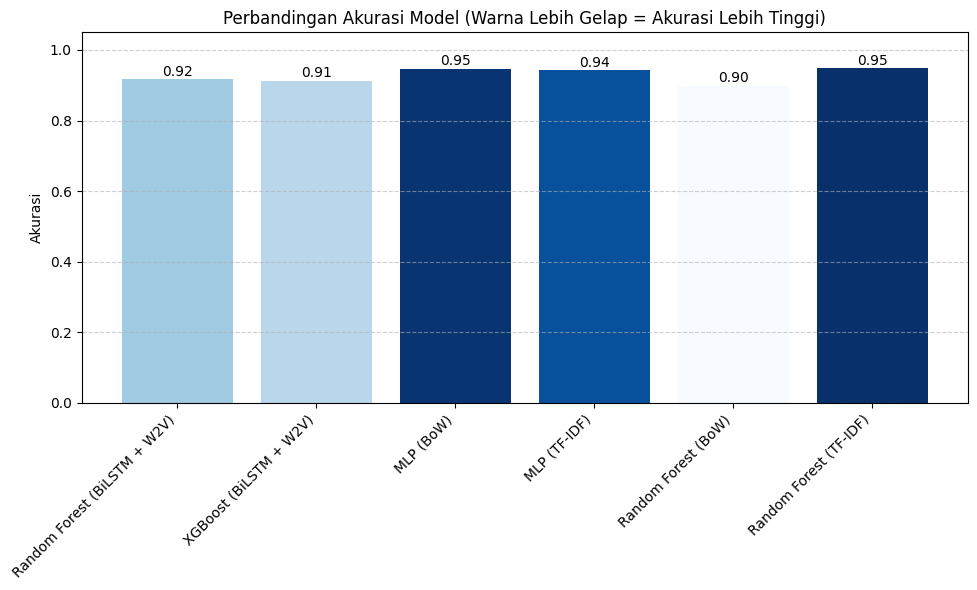

In [37]:
# Gunakan colormap 'Blues' dan buat akurasi tinggi → warna lebih gelap
cmap = plt.cm.Blues.reversed()
colors = [cmap(1.0 - norm) for norm in normalized]  # semakin tinggi akurasi → warna semakin gelap

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(accuracies.keys(), accuracy_values, color=colors)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Model (Warna Lebih Gelap = Akurasi Lebih Tinggi)')
plt.ylim(0, 1.05)

# Tambah nilai akurasi di atas bar
for bar, acc in zip(bars, accuracy_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{acc:.2f}", ha='center')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Terakhir, untuk melihat performa dari masing-masing model secara lebih intuitif, saya merepresentasikannya dalam bentuk **bar chart**. Pada visualisasi tersebut, warna batang disusun menggunakan gradasi biru, di mana **warna yang lebih gelap menunjukkan akurasi yang lebih tinggi**. Hal ini dilakukan dengan cara membalik normalisasi nilai akurasi agar model dengan kinerja terbaik ditampilkan dengan visual yang paling mencolok.

Dalam grafik tersebut terlihat bahwa **Random Forest (TF-IDF)** dan **MLP (BoW)** menjadi dua model dengan performa tertinggi, masing-masing meraih akurasi sebesar **95%**. Sementara itu, model-model berbasis **BiLSTM + Word2Vec**, baik dengan Random Forest maupun XGBoost, menunjukkan akurasi yang kompetitif namun sedikit lebih rendah, yaitu di kisaran **91–92%**.

Visualisasi ini tidak hanya memudahkan dalam membandingkan hasil antar model, tetapi juga memperjelas bahwa pendekatan berbasis representasi teks tradisional seperti TF-IDF dan BoW masih sangat efektif, bahkan dapat mengungguli model deep learning dalam beberapa kasus.